![Dataging](https://raw.githubusercontent.com/dataging/public-resources/61263724aea5476ba5ebf38478beada519091957/logodataging.png)

In [11]:
import os
from dotenv import load_dotenv

load_dotenv() #lee las variables de entorno del archivo .env

servidor = os.getenv("SERVIDOR_MYSQL")
usuario = os.getenv("USUARIO_MYSQL")
password = os.getenv("PASSWORD_MYSQL")

import mysql.connector
try:
    cnx = mysql.connector.connect(user=usuario, password=password,
                              host=servidor, database='sakila') # Definimos la cadena de conexión de la base de datos e intentamos conectar
    cursor=cnx.cursor() #Creamos una cursos para poder ejecutar consultas
    cursor.execute("""SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id = customer.customer_id
    INNER JOIN inventory ON rental.inventory_id = inventory.inventory_id
    INNER JOIN store ON inventory.store_id = store.store_id
    INNER JOIN address ON store.address_id = address.address_id
    INNER JOIN city ON address.city_id = city.city_id
    INNER JOIN film ON inventory.film_id = film.film_id
    ;""") #Ejecutamos la consulta SQL
    resultado = cursor.fetchall() # Obtenemos todas las filas de la consulta
except mysql.connector.Error as err:
    print("Error conectando a la base de datos " + err)
    
cursor.close() 
cnx.close()

In [13]:
import pandas as pd
#Convertimos el resultado en un DataFrame de Pandas seleccionando solo cuatro columnas
df = pd.DataFrame(resultado, columns=['rental_id','rental_date','return_date','customer_lastname','store_id','rental_store_city','film_title','film_rental_duration','film_rental_rate','film_replacement_cost','film_rating']) 
df.head() # Mostramos las cinco primeras filas del DataFrame

,rental_id,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
0,4863,2005-07-08 19:03:15,2005-07-11 21:29:15,FRANCISCO,1,Lethbridge,ACADEMY DINOSAUR,6,0.99,20.99,PG
1,11433,2005-08-02 20:13:10,2005-08-11 21:35:10,HARDER,1,Lethbridge,ACADEMY DINOSAUR,6,0.99,20.99,PG
2,14714,2005-08-21 21:27:43,2005-08-30 22:26:43,SHELTON,1,Lethbridge,ACADEMY DINOSAUR,6,0.99,20.99,PG
3,972,2005-05-30 20:21:07,2005-06-06 00:36:07,CURRIER,1,Lethbridge,ACADEMY DINOSAUR,6,0.99,20.99,PG
4,2117,2005-06-17 20:24:00,2005-06-23 17:45:00,ARNOLD,1,Lethbridge,ACADEMY DINOSAUR,6,0.99,20.99,PG


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_id              16044 non-null  int64         
 1   rental_date            16044 non-null  datetime64[ns]
 2   return_date            15861 non-null  datetime64[ns]
 3   customer_lastname      16044 non-null  object        
 4   store_id               16044 non-null  int64         
 5   rental_store_city      16044 non-null  object        
 6   film_title             16044 non-null  object        
 7   film_rental_duration   16044 non-null  int64         
 8   film_rental_rate       16044 non-null  object        
 9   film_replacement_cost  16044 non-null  object        
 10  film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 1.3+ MB


In [15]:
df.describe()

,rental_id,rental_date,return_date,store_id,film_rental_duration
count,16044.000000,16044,15861,16044.000000,16044.00000
mean,8025.371478,2005-07-23 08:12:53.217526912,2005-07-25 23:58:03.138768128,1.506171,4.93549
min,1.000000,2005-05-24 22:53:30,2005-05-25 23:55:21,1.000000,3.00000
25%,4013.750000,2005-07-07 00:58:40.500000,2005-07-10 15:49:36,1.000000,4.00000
50%,8025.500000,2005-07-28 16:04:32.500000,2005-08-01 19:45:29,2.000000,5.00000
75%,12037.250000,2005-08-17 21:16:23,2005-08-20 23:35:55,2.000000,6.00000
max,16049.000000,2006-02-14 15:16:03,2005-09-02 02:35:22,2.000000,7.00000
std,4632.777249,NaN,NaN,0.499978,1.40169


In [17]:
df["film_rental_duration"].mean()

np.float64(4.935489902767389)

<Axes: >

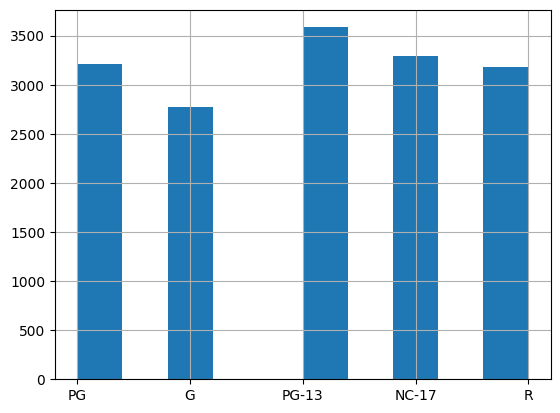

In [19]:
df.film_rating.hist()

<Axes: xlabel='film_rental_duration'>

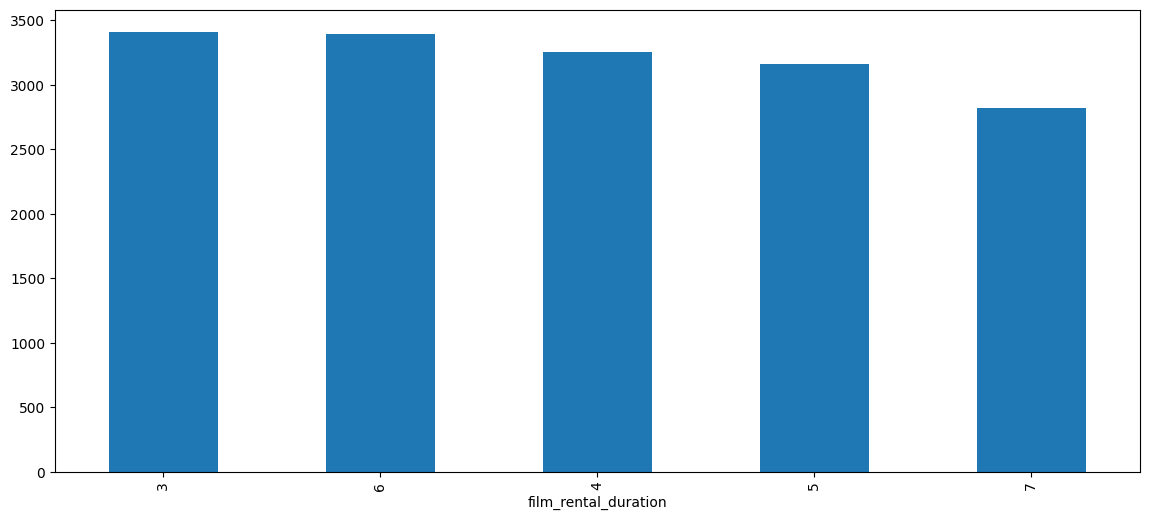

In [20]:
df['film_rental_duration'].value_counts().plot(kind='bar', figsize=(14,6))

<Axes: ylabel='count'>

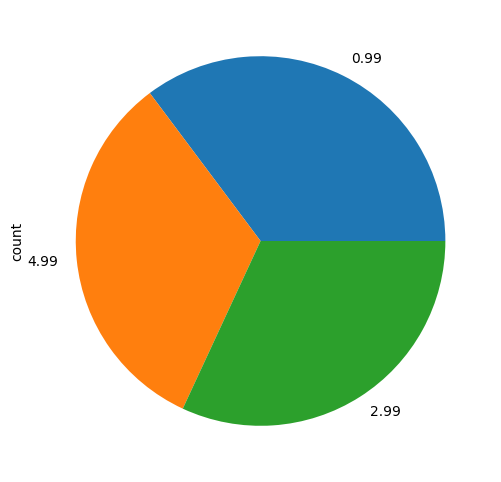

In [21]:
df['film_rental_rate'].value_counts().plot(kind='pie', figsize=(6,6))

<Axes: xlabel='film_rental_rate'>

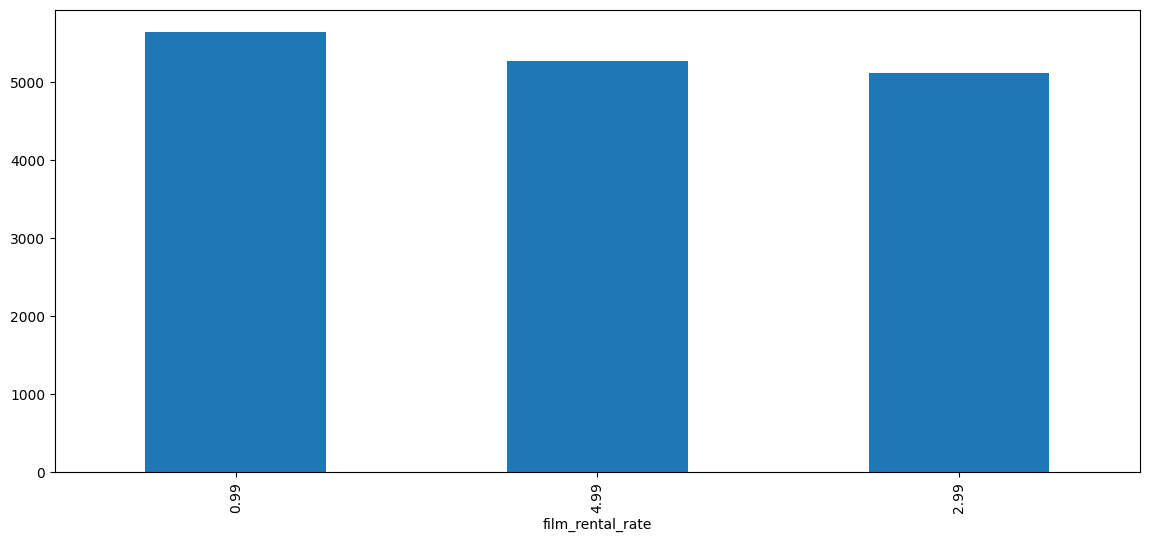

In [22]:
df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,6))

In [23]:
df['film_replacement_cost'].plot(kind='box', vert=False, figsize=(14,6))

TypeError: no numeric data to plot

In [24]:
ax = df['film_replacement_cost'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_replacement_cost'].mean(), color='red')
ax.axvline(df['film_replacement_cost'].median(), color='green')

TypeError: no numeric data to plot

<Axes: xlabel='film_rating'>

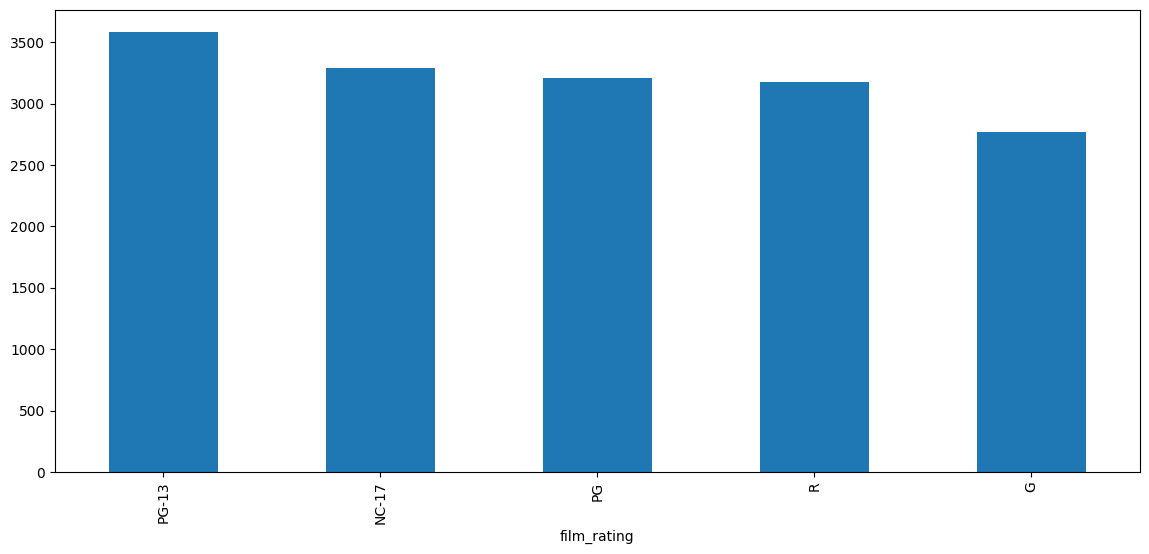

In [25]:
df['film_rating'].value_counts().plot(kind='bar', figsize=(14,6))

In [26]:
df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(14,6))

ValueError: Number of columns must be a positive integer, not 0

<Figure size 1400x600 with 0 Axes>

In [27]:
df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)

df['rental_days'].head()

C:\Users\anton\AppData\Local\Temp\ipykernel_37212\1626817116.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)


0    3.0
1    9.0
2    9.0
3    6.0
4    5.0
Name: rental_days, dtype: float64

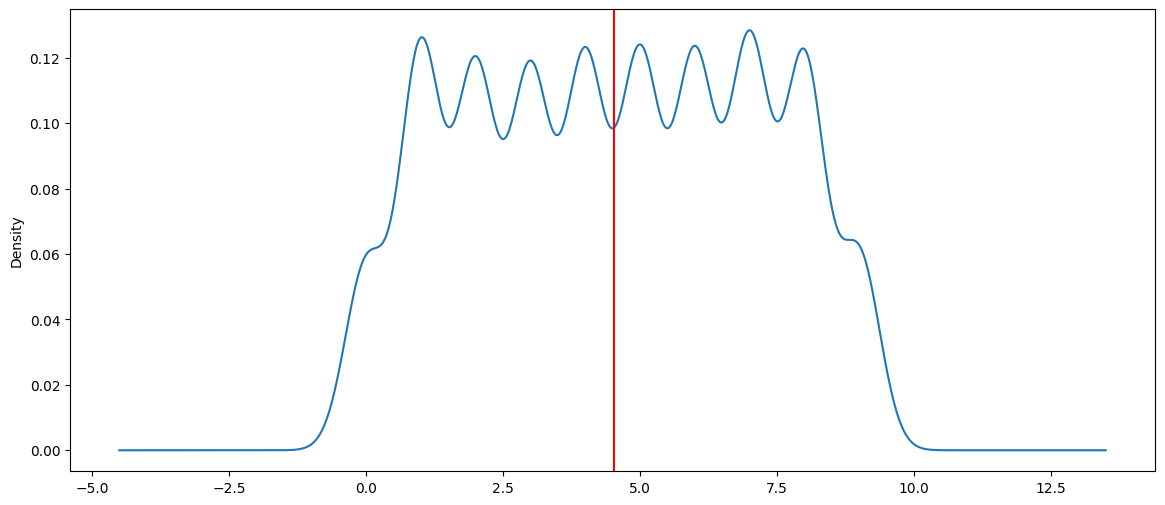

In [28]:
ax = df['rental_days'].plot(kind='density', figsize=(14,6))
ax.axvline(df['rental_days'].mean(), color='red')

In [29]:
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']

df['film_daily_rental_rate'].head()

0    0.165
1    0.165
2    0.165
3    0.165
4    0.165
Name: film_daily_rental_rate, dtype: object

In [30]:
ax = df['film_daily_rental_rate'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_daily_rental_rate'].mean(), color='red')

TypeError: no numeric data to plot

In [31]:
# Las 10 películas con menor rate diario
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min()].head(10)

,rental_id,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
217,1861,2005-06-17 01:17:31,2005-06-25 02:11:31,GRESHAM,1,Lethbridge,ANONYMOUS HUMAN,7,0.99,12.99,NC-17,8.0,0.1414285714285714285714285714
218,6813,2005-07-12 18:03:50,2005-07-16 16:30:50,ROGERS,1,Lethbridge,ANONYMOUS HUMAN,7,0.99,12.99,NC-17,3.0,0.1414285714285714285714285714
219,10249,2005-08-01 02:35:39,2005-08-06 06:50:39,NEUMANN,1,Lethbridge,ANONYMOUS HUMAN,7,0.99,12.99,NC-17,5.0,0.1414285714285714285714285714
220,13450,2005-08-20 00:18:15,2005-08-24 19:36:15,RIVERA,1,Lethbridge,ANONYMOUS HUMAN,7,0.99,12.99,NC-17,4.0,0.1414285714285714285714285714
221,4267,2005-07-07 14:35:30,2005-07-11 10:41:30,IRBY,1,Lethbridge,ANONYMOUS HUMAN,7,0.99,12.99,NC-17,3.0,0.1414285714285714285714285714
222,9814,2005-07-31 11:29:46,2005-08-08 15:49:46,BARNES,1,Lethbridge,ANONYMOUS HUMAN,7,0.99,12.99,NC-17,8.0,0.1414285714285714285714285714
223,12125,2005-08-17 23:24:25,2005-08-25 03:08:25,BOX,1,Lethbridge,ANONYMOUS HUMAN,7,0.99,12.99,NC-17,7.0,0.1414285714285714285714285714
224,8718,2005-07-29 17:41:14,2005-08-01 18:22:14,LEWIS,1,Lethbridge,ANONYMOUS HUMAN,7,0.99,12.99,NC-17,3.0,0.1414285714285714285714285714
225,11854,2005-08-17 13:42:52,2005-08-26 14:04:52,MAHON,1,Lethbridge,ANONYMOUS HUMAN,7,0.99,12.99,NC-17,9.0,0.1414285714285714285714285714
226,1751,2005-06-16 17:00:14,2005-06-17 12:12:14,FREEMAN,1,Lethbridge,ANONYMOUS HUMAN,7,0.99,12.99,NC-17,0.0,0.1414285714285714285714285714


In [32]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].max()].head(10)

,rental_id,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
144,207,2005-05-26 08:04:38,2005-05-27 09:32:38,PARKER,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,1.0,1.663333333333333333333333333
145,1454,2005-06-15 19:49:41,2005-06-17 15:17:41,PENA,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,1.0,1.663333333333333333333333333
146,4115,2005-07-07 06:52:23,2005-07-14 06:12:23,POULIN,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,6.0,1.663333333333333333333333333
147,10757,2005-08-01 20:22:44,2005-08-04 19:48:44,ARMSTRONG,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,2.0,1.663333333333333333333333333
148,14908,2005-08-22 04:44:10,2005-08-25 05:09:10,GILLILAND,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,3.0,1.663333333333333333333333333
149,135,2005-05-25 21:58:58,2005-06-03 17:50:58,ROYAL,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,8.0,1.663333333333333333333333333
150,2803,2005-06-19 19:18:27,2005-06-27 21:48:27,ORTIZ,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,8.0,1.663333333333333333333333333
151,6793,2005-07-12 16:37:55,2005-07-21 16:04:55,HUNT,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,8.0,1.663333333333333333333333333
152,9374,2005-07-30 19:10:03,2005-08-06 21:54:03,SILVERMAN,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,7.0,1.663333333333333333333333333
153,15643,2005-08-23 08:13:26,2005-08-25 05:18:26,PENA,1,Lethbridge,AMERICAN CIRCUS,3,4.99,17.99,R,1.0,1.663333333333333333333333333


In [33]:
df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

7923

<Axes: xlabel='film_rating'>

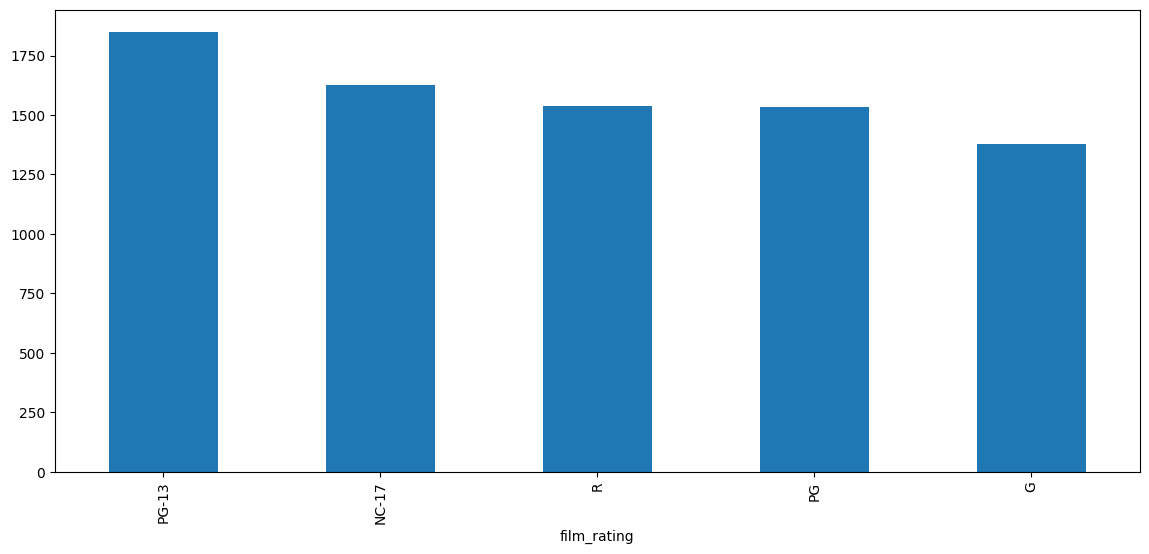

In [34]:
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts().plot(kind='bar', figsize=(14,6))

In [35]:
# Cuántos alquileres se realizaron en Woodridge de películas con duración mayor a 5 días
df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)].shape[0]

3186

In [36]:
# Alquileres de la tienda 2 o películas con coste de reemplazo menor a 10.99
df.loc[(df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99)].shape[0]

8775

# Visualización con Seaborn


# Visualización con Plotly